# Final Project – Credit Card Fraud

Course: Predictive Analytics for Business

Instructor: Florentino Rico, Ph.D

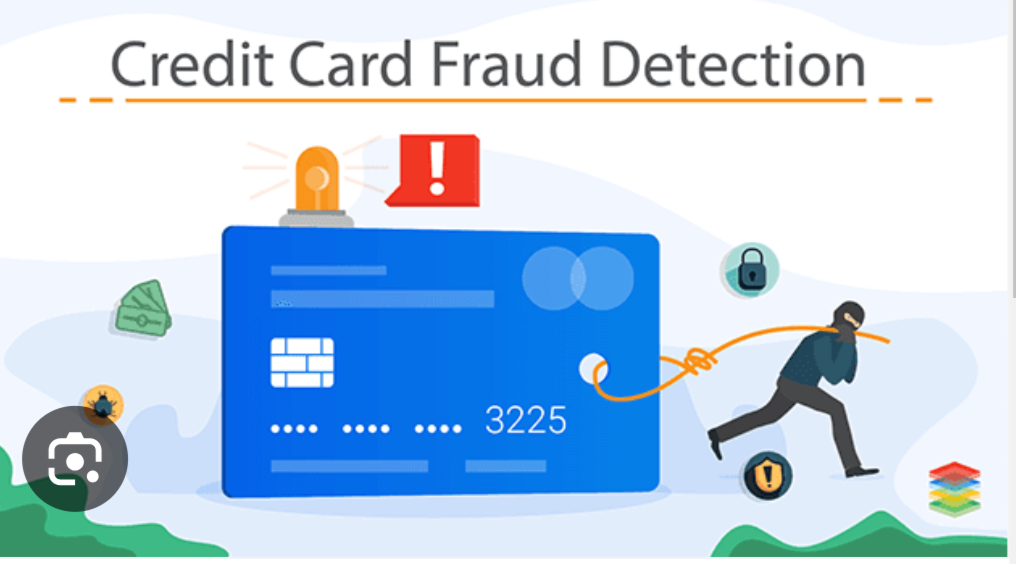

## **Libraries and Data Pull**

In [3]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #This library is built on matplotlib with enhanced graphing capabilities
from statsmodels.tsa.stattools import adfuller #adding this library to conduct adfuller tests
from statsmodels.tsa.stattools import acf
from numpy import log
import time
import gc
import warnings
from scipy.stats import uniform, randint

#machine learning libraries

# Import libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, ConfusionMatrixDisplay, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb

#import category_encoders as ce
# import plotly.graph_objs as go
# from tqdm import tqdm




import sys

warnings.filterwarnings("ignore")



In [5]:
import io
df = pd.read_json('transactions.txt',lines=True)


# Step-1

### Set up

- **a. Download and load your data**
  - Use your tool of choice (Google Colab or Jupyter Notebook). I have provided the code for this step.
  - Due to the size of the data, you will work with a sample of it (50%).
  - For the random state, use the last 3 digits (excluding any leading zeros) of your student ID.
  - This data is in line-delimited JSON format.
  
- **b. Describe the structure of the data**
  - Provide summary statistics for each feature.
  - Be sure to include a count of null, minimum, maximum, and unique values where appropriate.


***For faster processing i am using only 1000 samples you may remove this df=df.sample(datapoint)***

# Undersampling


In [298]:
# Undersampling
fraud_sample = df[df['isFraud'] == 1]
non_fraud_sample = df[df['isFraud'] == 0].sample(len(fraud_sample), random_state=42)
df = pd.concat([fraud_sample, non_fraud_sample])


# Equal Data Distibutation for best Model fitting 

In [301]:
len(df[df['isFraud'] == 1])
len(df[df['isFraud'] == 0])

12417

For the random state below, use the last 3 digits of your student id (not including any leading zeros)

In [304]:
student_id=742

**running code on 50% of the data for faster processing on the development**


In [307]:
#df = df.sample(frac=0.5, random_state=student_id)
#df.head()

In [309]:
df.shape

(24834, 29)

## Timer

In [312]:
#timer to leave system running after long code

#import time
#while True:
#    # Perform the desired operations here
 #  print("still here...")

    # Delay execution for 5 minutes
  # time.sleep(120)  # 120 seconds = 2 minutes

# Total Number of Features 

In [315]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

# Dataset describes

In [318]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,2.483400e+04,2.483400e+04,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000
mean,5.331338e+08,5.331338e+08,10973.785939,6209.005878,181.726540,552.417291,551.975638,4773.984859,4764.780061
std,2.531578e+08,2.531578e+08,11923.876339,8808.376920,174.979895,262.365165,262.246666,3010.926161,6939.382617
min,1.000881e+08,1.000881e+08,250.000000,-614.390000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.298448e+08,3.298448e+08,5000.000000,1073.885000,53.300000,325.000000,325.000000,2178.000000,751.260000
50%,4.906674e+08,4.906674e+08,7500.000000,3181.395000,130.565000,546.000000,545.000000,4739.000000,2610.325000
75%,7.655672e+08,7.655672e+08,15000.000000,7500.000000,257.165000,802.000000,799.000000,7382.000000,5473.285000
max,9.992836e+08,9.992836e+08,50000.000000,50000.000000,1608.350000,998.000000,998.000000,9998.000000,47473.940000


# Dataset Information

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24834 entries, 694 to 757365
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   accountNumber             24834 non-null  int64  
 1   customerId                24834 non-null  int64  
 2   creditLimit               24834 non-null  int64  
 3   availableMoney            24834 non-null  float64
 4   transactionDateTime       24834 non-null  object 
 5   transactionAmount         24834 non-null  float64
 6   merchantName              24834 non-null  object 
 7   acqCountry                24834 non-null  object 
 8   merchantCountryCode       24834 non-null  object 
 9   posEntryMode              24834 non-null  object 
 10  posConditionCode          24834 non-null  object 
 11  merchantCategoryCode      24834 non-null  object 
 12  currentExpDate            24834 non-null  object 
 13  accountOpenDate           24834 non-null  object 
 14  dateOfLa

# Null Values

In [324]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

# Values Count

In [327]:
print(df['isFraud'].value_counts())


isFraud
True     12417
False    12417
Name: count, dtype: int64


# categorical values are

In [330]:
df.acqCountry.unique()

array(['US', '', 'CAN', 'MEX', 'PR'], dtype=object)

In [332]:
df.merchantCountryCode.unique()

array(['US', 'CAN', 'MEX', 'PR', ''], dtype=object)

In [334]:
df.posEntryMode.unique()

array(['09', '02', '05', '80', '', '90'], dtype=object)

In [336]:
df.isFraud.unique()

array([ True, False])

In [338]:
df.merchantState.unique()

array([''], dtype=object)

In [340]:
df.cardPresent.unique()

array([False,  True])

In [342]:
df.transactionType.unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', ''], dtype=object)

# Step-2: Data Cleaning and Preparation

### Data Cleaning and Preparation

- **a. Identify if there are missing/null values and display the number of missing values per column.**
  - Choose to keep, replace, or drop missing values. 
  - Explain why you made each choice.

- **b. Handling Duplicated Transactions**
  - You will notice a number of duplicated transactions in the data set. Two common types of duplicated transactions are:
    - **Reversed Transactions:** A purchase followed by a reversal.
    - **Multi-Swipe Transactions:** A vendor accidentally charges a customer's card multiple times within a short time span.

  - **I. Can you identify reversed and multi-swipe transactions?**

  - **II. What total number of transactions and total dollar amount do you estimate for the reversed transactions?**
    - For multi-swipe transactions, consider the first transaction to be "normal" and exclude it from the number of transactions and dollar amount counts.


# Lets check NUll values

In [346]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

# No need to Drop values dataset don't have any missing value 

### Explanation of the Choices for Handling Missing Data:

- **Keep Missing Values**:
  - If the missing data does not significantly impact the analysis and the model can handle it, you may choose to leave the missing values. For example, tree-based models like Random Forest or Decision Trees can handle missing data without needing imputation, so it may be fine to keep the missing values.
  
- **Replace Missing Values (Imputation)**:
  - If the missing data is minimal and its absence can be considered random or predictable, replacing missing values is a good strategy. For numerical columns, the missing values can be imputed using the **mean**, **median**, or **mode**. For categorical columns, the most frequent category (mode) can be used to fill in missing values.
  
- **Drop Missing Values**:
  - If the proportion of missing values is high (e.g., more than 50% of a column is missing) or if the missing values cannot be reasonably imputed, it is often better to **drop** the column or row. Dropping rows with missing data may be appropriate if the loss of data is minimal or if the rows don't significantly contribute to the dataset.


In [350]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])


In [352]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
694,984504651,984504651,50000,8613.80,2016-09-08 16:14:40,165.26,Walgreens #860120,US,US,09,...,,41386.20,,,,False,,,False,True
971,114896048,114896048,15000,14113.96,2016-01-06 08:05:06,298.85,sears.com,US,US,09,...,,886.04,,,,False,,,False,True
1072,114896048,114896048,15000,13702.47,2016-03-07 02:40:54,406.89,Planet Fitness #136615,US,US,09,...,,1297.53,,,,False,,,False,True
1113,114896048,114896048,15000,8943.58,2016-04-09 15:14:04,439.31,oldnavy.com,US,US,09,...,,6056.42,,,,False,,,False,True
1321,114896048,114896048,15000,5223.03,2016-08-24 01:24:35,266.09,sears.com,US,US,09,...,,9776.97,,,,False,,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335955,183856695,183856695,10000,9552.03,2016-03-20 11:56:52,110.51,apple.com,US,US,02,...,,447.97,,,,False,,,False,False
157182,584630615,584630615,20000,16951.45,2016-09-24 23:47:31,78.02,discount.com,US,US,02,...,,3048.55,,,,False,,,False,False
561557,628781966,628781966,15000,13513.89,2016-09-01 00:59:52,39.86,Mobil Gas #445483,US,US,90,...,,1486.11,,,,True,,,False,False
344148,289773905,289773905,15000,10611.75,2016-06-15 01:04:25,267.22,oldnavy.com,US,US,09,...,,4388.25,,,,False,,,False,False


# Time-Date  Column transformation 

In [355]:
# Convert the datetime column to pandas datetime format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Feature Engineering
# 1. Extract date components
df['year'] = df['transactionDateTime'].dt.year
df['month'] = df['transactionDateTime'].dt.month
df['day'] = df['transactionDateTime'].dt.day
df['day_of_week'] = df['transactionDateTime'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['transactionDateTime'].dt.hour
df['minute'] = df['transactionDateTime'].dt.minute
df['second'] = df['transactionDateTime'].dt.second

#  Handling Duplicated Transactions

In [358]:
# Step 1: Convert 'transactionDateTime' to datetime format for easy comparison
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Step 2: Sort the data by 'accountNumber' and 'transactionDateTime' for better comparison
df = df.sort_values(by=['accountNumber', 'transactionDateTime'])

# 1. Identifying Reversed Transactions
# We can assume a reversed transaction might have the opposite sign of the purchase amount (negative value)
reversed_transactions = df[df['transactionAmount'] < 0]

# Find the pair of purchase and reversal by checking transaction date proximity
# Look for reversed transactions that happen within a short time frame (e.g., within 24 hours)
reversed_groups = reversed_transactions.groupby('accountNumber')

reversed_pairs = []
for _, group in reversed_groups:
    # Check if for each reversed transaction there's a matching positive amount before it
    for idx, row in group.iterrows():
        purchase = df[(df['accountNumber'] == row['accountNumber']) & 
                      (df['transactionDateTime'] < row['transactionDateTime']) & 
                      (df['transactionAmount'] == abs(row['transactionAmount']))]
        if not purchase.empty:
            reversed_pairs.append((purchase, row))

# 2. Identifying Multi-Swipe Transactions
# Multi-swipe transactions happen when the same account number is charged multiple times at the same merchant
multi_swipe_transactions = []

# Define a time window to consider multi-swipes (e.g., 10 minutes)
time_window = pd.Timedelta(minutes=10)

# Compare transactions for the same account and merchant
for _, group in df.groupby(['accountNumber', 'merchantName']):
    for i in range(len(group) - 1):
        current_transaction = group.iloc[i]
        for j in range(i + 1, len(group)):
            next_transaction = group.iloc[j]
            # Check if the amounts are similar and transactions happened within the time window
            if abs(current_transaction['transactionAmount'] - next_transaction['transactionAmount']) < 1e-2:  # Same amount
                time_diff = next_transaction['transactionDateTime'] - current_transaction['transactionDateTime']
                if time_diff <= time_window:
                    multi_swipe_transactions.append((current_transaction, next_transaction))

# Results for Reversed Transactions:
print(f"Number of reversed transactions: {len(reversed_pairs)}")
reversed_amount = sum([pair[1]['transactionAmount'] for pair in reversed_pairs])
print(f"Total dollar amount of reversed transactions: ${abs(reversed_amount):,.2f}")

# Results for Multi-Swipe Transactions:
print(f"Number of multi-swipe transactions: {len(multi_swipe_transactions)}")
multi_swipe_amount = sum([pair[0]['transactionAmount'] for pair in multi_swipe_transactions])
print(f"Total dollar amount of multi-swipe transactions: ${multi_swipe_amount:,.2f}")


Number of reversed transactions: 0
Total dollar amount of reversed transactions: $0.00
Number of multi-swipe transactions: 248
Total dollar amount of multi-swipe transactions: $55,835.93


<h1 align="center"> Step 3: Descriptive Analysis </h1>

<p><strong>Visualize the Data:</strong> In this step, visualize the relationship between the features and the target variable (fraud). Use relevant plots like histograms, box plots, correlation heatmaps, or scatter plots to identify potential patterns and associations. Select the most useful visualizations that will help you understand the data and gain insights into the factors contributing to fraud.</p>

<p><strong>Initial Hypothesis:</strong> Based on the visualizations, propose an initial hypothesis about which variables seem to have a significant impact on the target variable (fraud). This could involve identifying patterns such as certain features that are more prominent in fraudulent transactions compared to legitimate ones.</p>

<p><strong>Insights and Summary:</strong> Summarize your findings from the visualizations, highlighting key observations that may guide your subsequent modeling efforts. Provide a clear explanation of the relationships you've discovered between the features and the target, and how they inform your hypothesis about fraud prediction.</p>

<p><em>Note: The analysis should be comprehensive and supported by visual evidence from your plots. Ensure that the notebook is well-organized and the visualizations are clearly interpreted.</em></p>


In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Basic Descriptive Statistics
print("Descriptive Statistics:")
df.describe()



Descriptive Statistics:


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance,year,month,day,day_of_week,hour,minute,second
count,2.483400e+04,2.483400e+04,24834.000000,24834.000000,24834,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.0,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000,24834.000000
mean,5.331338e+08,5.331338e+08,10973.785939,6209.005878,2016-07-03 06:47:10.805991936,181.726540,552.417291,551.975638,4773.984859,4764.780061,2016.0,6.556133,15.744181,3.011436,11.511355,29.588387,29.602803
min,1.000881e+08,1.000881e+08,250.000000,-614.390000,2016-01-01 00:04:10,0.000000,100.000000,0.000000,0.000000,0.000000,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.298448e+08,3.298448e+08,5000.000000,1073.885000,2016-04-03 02:36:43.750000128,53.300000,325.000000,325.000000,2178.000000,751.260000,2016.0,4.000000,8.000000,1.000000,6.000000,15.000000,14.000000
50%,4.906674e+08,4.906674e+08,7500.000000,3181.395000,2016-07-03 17:44:29,130.565000,546.000000,545.000000,4739.000000,2610.325000,2016.0,7.000000,16.000000,3.000000,12.000000,30.000000,30.000000
75%,7.655672e+08,7.655672e+08,15000.000000,7500.000000,2016-10-02 15:57:46.750000128,257.165000,802.000000,799.000000,7382.000000,5473.285000,2016.0,10.000000,23.000000,5.000000,17.000000,45.000000,45.000000
max,9.992836e+08,9.992836e+08,50000.000000,50000.000000,2016-12-30 23:52:27,1608.350000,998.000000,998.000000,9998.000000,47473.940000,2016.0,12.000000,31.000000,6.000000,23.000000,59.000000,59.000000
std,2.531578e+08,2.531578e+08,11923.876339,8808.376920,NaN,174.979895,262.365165,262.246666,3010.926161,6939.382617,0.0,3.446084,8.805175,1.995492,6.853875,17.305886,17.396728


In [363]:
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,recurringAuthInd,expirationDateKeyInMatch,isFraud,year,month,day,day_of_week,hour,minute,second
541907,100088067,100088067,50000,49500.39,2016-02-09 23:44:13,23.06,South Cafe,US,US,02,...,,False,False,2016,2,9,1,23,44,13
541928,100088067,100088067,50000,49560.51,2016-06-28 00:10:59,1.14,AMC #79863,US,US,05,...,,False,False,2016,6,28,1,0,10,59
541973,100088067,100088067,50000,49734.57,2016-12-26 19:14:46,309.96,South Cafe,US,US,,...,,False,True,2016,12,26,0,19,14,46
87922,100328049,100328049,5000,4571.68,2016-01-30 23:14:59,186.11,oldnavy.com,US,US,09,...,,False,False,2016,1,30,5,23,14,59
87940,100328049,100328049,5000,5000.00,2016-04-04 23:20:25,82.31,Lyft,US,US,09,...,,False,False,2016,4,4,0,23,20,25


In [365]:
df['cardPresent']=df['cardPresent'].astype(int)
df['isFraud']=df['isFraud'].astype(int)
df['expirationDateKeyInMatch']=df['expirationDateKeyInMatch'].astype(int)
df.head(4)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,recurringAuthInd,expirationDateKeyInMatch,isFraud,year,month,day,day_of_week,hour,minute,second
541907,100088067,100088067,50000,49500.39,2016-02-09 23:44:13,23.06,South Cafe,US,US,02,...,,0,0,2016,2,9,1,23,44,13
541928,100088067,100088067,50000,49560.51,2016-06-28 00:10:59,1.14,AMC #79863,US,US,05,...,,0,0,2016,6,28,1,0,10,59
541973,100088067,100088067,50000,49734.57,2016-12-26 19:14:46,309.96,South Cafe,US,US,,...,,0,1,2016,12,26,0,19,14,46
87922,100328049,100328049,5000,4571.68,2016-01-30 23:14:59,186.11,oldnavy.com,US,US,09,...,,0,0,2016,1,30,5,23,14,59


# Visualization

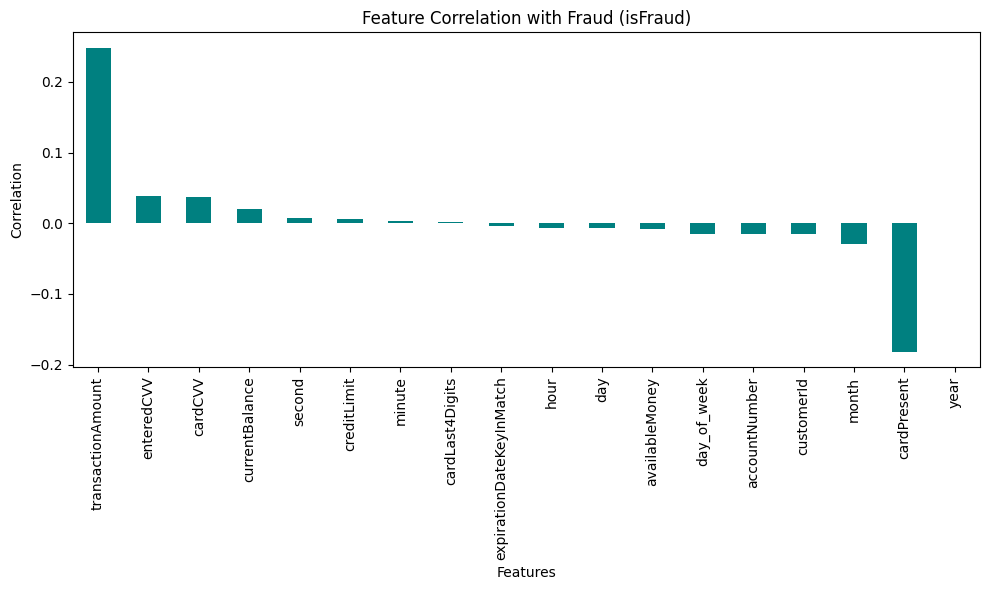

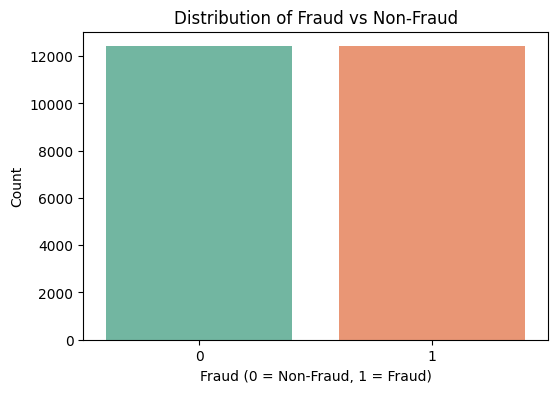

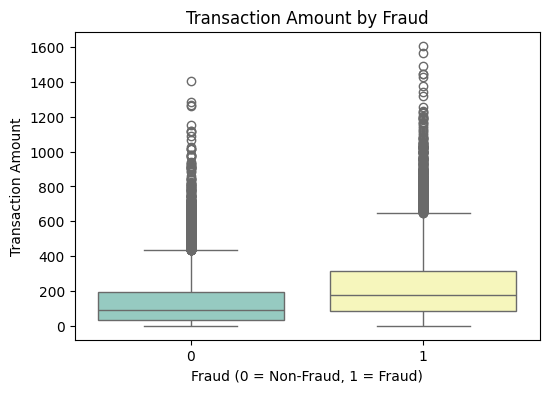

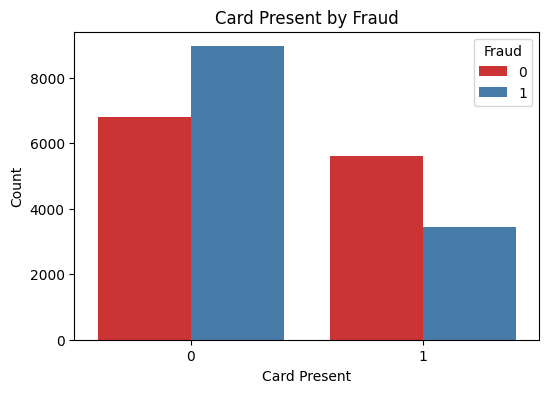

Features Most Correlated with Fraud:
isFraud                     1.000000
transactionAmount           0.248544
enteredCVV                  0.038442
cardCVV                     0.037790
currentBalance              0.019784
second                      0.006754
creditLimit                 0.005969
minute                      0.002871
cardLast4Digits             0.001457
expirationDateKeyInMatch   -0.003537
Name: isFraud, dtype: float64


In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you filter numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Step 3: Focus on Correlation with Target (isFraud)
target_corr = correlation_matrix['isFraud'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr.drop('isFraud').plot(kind='bar', color='teal')
plt.title("Feature Correlation with Fraud (isFraud)")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 3: Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='isFraud', palette='Set2')
plt.title("Distribution of Fraud vs Non-Fraud")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# Step 4: Visualizing Relationships Between Features and Target
# Example: Comparing transactionAmount with fraud
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='isFraud', y='transactionAmount', palette='Set3')
plt.title("Transaction Amount by Fraud")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

# Example: Visualizing cardPresent vs Fraud
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cardPresent', hue='isFraud', palette='Set1')
plt.title("Card Present by Fraud")
plt.xlabel("Card Present")
plt.ylabel("Count")
plt.legend(title="Fraud")
plt.show()

# Step 5: Insights
# Print specific insights
fraud_correlation = correlation_matrix['isFraud'].sort_values(ascending=False)
print("Features Most Correlated with Fraud:")
print(fraud_correlation.head(10))


<h1 align="center">Machine Learning Modeling: Data Preparation</h1>

<h2>1. Handling Variables</h2>
<p>Drop redundant, empty, or irrelevant variables for model development.</p>

<h2>2. One-Hot Encoding</h2>
<p>Conduct one-hot encoding for categorical variables in the dataset.</p>

<h2>3. Standardization of Continuous Variables</h2>
<p>Standardize continuous variables only if deemed necessary based on the scale of the data.</p>

<h2>4. Feature Engineering</h2>
<p>Create additional features or flags that may help in fraud prediction.</p>

<h2>5. Dataset Splitting</h2>
<p>Split the dataset into <b>X</b> (independent variables) and <b>Y</b> (dependent variable).</p>

<h2>6. Train-Test Split</h2>
<p>Perform a train-test split with a 70-30 ratio to create <b>X_train</b>, <b>X_test</b>, <b>y_train</b>, and <b>y_test</b>.</p>
>

# 1. Handling Variables
Drop redundant, empty, or irrelevant variables for model development.

In [372]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud', 'year',
       'month', 'day', 'day_of_week', 'hour', 'minute', 'second'],
      dtype='object')

In [375]:
df=df.drop(columns=['merchantZip','merchantState','merchantCity','echoBuffer','recurringAuthInd','posOnPremises'])

***Handling Data-Types***

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24834 entries, 541907 to 670094
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   accountNumber             24834 non-null  int64         
 1   customerId                24834 non-null  int64         
 2   creditLimit               24834 non-null  int64         
 3   availableMoney            24834 non-null  float64       
 4   transactionDateTime       24834 non-null  datetime64[ns]
 5   transactionAmount         24834 non-null  float64       
 6   merchantName              24834 non-null  object        
 7   acqCountry                24834 non-null  object        
 8   merchantCountryCode       24834 non-null  object        
 9   posEntryMode              24834 non-null  object        
 10  posConditionCode          24834 non-null  object        
 11  merchantCategoryCode      24834 non-null  object        
 12  currentExpDate   

In [380]:
df['cardPresent']=df['cardPresent'].astype(int)
df['isFraud']=df['isFraud'].astype(int)
df['expirationDateKeyInMatch']=df['expirationDateKeyInMatch'].astype(int)
df.head(4)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardPresent,expirationDateKeyInMatch,isFraud,year,month,day,day_of_week,hour,minute,second
541907,100088067,100088067,50000,49500.39,2016-02-09 23:44:13,23.06,South Cafe,US,US,02,...,1,0,0,2016,2,9,1,23,44,13
541928,100088067,100088067,50000,49560.51,2016-06-28 00:10:59,1.14,AMC #79863,US,US,05,...,1,0,0,2016,6,28,1,0,10,59
541973,100088067,100088067,50000,49734.57,2016-12-26 19:14:46,309.96,South Cafe,US,US,,...,1,0,1,2016,12,26,0,19,14,46
87922,100328049,100328049,5000,4571.68,2016-01-30 23:14:59,186.11,oldnavy.com,US,US,09,...,0,0,0,2016,1,30,5,23,14,59


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24834 entries, 541907 to 670094
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   accountNumber             24834 non-null  int64         
 1   customerId                24834 non-null  int64         
 2   creditLimit               24834 non-null  int64         
 3   availableMoney            24834 non-null  float64       
 4   transactionDateTime       24834 non-null  datetime64[ns]
 5   transactionAmount         24834 non-null  float64       
 6   merchantName              24834 non-null  object        
 7   acqCountry                24834 non-null  object        
 8   merchantCountryCode       24834 non-null  object        
 9   posEntryMode              24834 non-null  object        
 10  posConditionCode          24834 non-null  object        
 11  merchantCategoryCode      24834 non-null  object        
 12  currentExpDate   

**2. One-Hot Encoding
Conduct one-hot encoding for categorical variables in the dataset.**

In [385]:
df.acqCountry.unique()

array(['US', 'PR', '', 'MEX', 'CAN'], dtype=object)

In [387]:
df.merchantCountryCode.unique()

array(['US', 'PR', 'MEX', '', 'CAN'], dtype=object)

In [389]:
df.accountNumber #drop it
df.creditLimit 
df.transactionDateTime # drop it
df.transactionAmount
df.merchantName # drop it
df.acqCountry #string 
df.merchantCountryCode
df.posEntryMode
df.posConditionCode
df.merchantCategoryCode
df.merchantCategoryCode.unique() # label encoding
df.cardCVV
df.enteredCVV
df.transactionType.unique() # encoding
df.currentBalance
df.cardPresent
df.expirationDateKeyInMatch.unique()
df.expirationDateKeyInMatch.unique() # drop 
df.cardPresent


541907    1
541928    1
541973    1
87922     0
87940     0
         ..
545563    0
669993    0
670017    0
670025    0
670094    0
Name: cardPresent, Length: 24834, dtype: int32

In [391]:
df.merchantCategoryCode.unique()

array(['food', 'entertainment', 'online_retail', 'rideshare', 'fastfood',
       'online_subscriptions', 'auto', 'personal care', 'mobileapps',
       'furniture', 'online_gifts', 'fuel', 'subscriptions', 'gym',
       'hotels', 'food_delivery', 'airline', 'health', 'cable/phone'],
      dtype=object)

# 2- One Hot Encoding

In [394]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming the dataframe 'df' already exists
# List of categorical columns
categorical_columns = ['merchantCategoryCode', 'acqCountry', 'merchantCountryCode', 'transactionType']

# Initialize the OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame for the encoded columns
encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(categorical_columns), 
    index=df.index
)

# Drop the original categorical columns and concatenate the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Display the transformed DataFrame
print(df_encoded.head())


        accountNumber  customerId  creditLimit  availableMoney  \
541907      100088067   100088067        50000        49500.39   
541928      100088067   100088067        50000        49560.51   
541973      100088067   100088067        50000        49734.57   
87922       100328049   100328049         5000         4571.68   
87940       100328049   100328049         5000         5000.00   

       transactionDateTime  transactionAmount merchantName posEntryMode  \
541907 2016-02-09 23:44:13              23.06   South Cafe           02   
541928 2016-06-28 00:10:59               1.14   AMC #79863           05   
541973 2016-12-26 19:14:46             309.96   South Cafe                
87922  2016-01-30 23:14:59             186.11  oldnavy.com           09   
87940  2016-04-04 23:20:25              82.31         Lyft           09   

       posConditionCode currentExpDate  ... acqCountry_MEX acqCountry_PR  \
541907               01        09/2028  ...            0.0           0.0   


In [396]:
df_encoded.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'posEntryMode', 'posConditionCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'year', 'month', 'day', 'day_of_week', 'hour', 'minute', 'second',
       'merchantCategoryCode_auto', 'merchantCategoryCode_cable/phone',
       'merchantCategoryCode_entertainment', 'merchantCategoryCode_fastfood',
       'merchantCategoryCode_food', 'merchantCategoryCode_food_delivery',
       'merchantCategoryCode_fuel', 'merchantCategoryCode_furniture',
       'merchantCategoryCode_gym', 'merchantCategoryCode_health',
       'merchantCategoryCode_hotels', 'merchantCategoryCode_mobileapps',
       'merchantCategoryCode_online_gifts',
       'merchantCategoryCode_online_retail',
       'merchantCategoryCode_

# Data types Handling

In [399]:
# Convert all boolean columns to integer
boolean_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

In [401]:
df_encoded.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'posEntryMode', 'posConditionCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'currentBalance', 'cardPresent', 'expirationDateKeyInMatch', 'isFraud',
       'year', 'month', 'day', 'day_of_week', 'hour', 'minute', 'second',
       'merchantCategoryCode_auto', 'merchantCategoryCode_cable/phone',
       'merchantCategoryCode_entertainment', 'merchantCategoryCode_fastfood',
       'merchantCategoryCode_food', 'merchantCategoryCode_food_delivery',
       'merchantCategoryCode_fuel', 'merchantCategoryCode_furniture',
       'merchantCategoryCode_gym', 'merchantCategoryCode_health',
       'merchantCategoryCode_hotels', 'merchantCategoryCode_mobileapps',
       'merchantCategoryCode_online_gifts',
       'merchantCategoryCode_online_retail',
       'merchantCategoryCode_

In [403]:
df=df_encoded

**Conversion of Object dataype into Integer**

In [406]:
 # Convert all 'object' type columns to integers
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    try:
        # Attempt to convert directly if numeric
        df[col] = df[col].astype(int)
    except ValueError:
        # Map string values to integers if not numeric
        df[col] = df[col].astype('category').cat.codes

print("Updated DataFrame:")
print(df.info())


Updated DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 24834 entries, 541907 to 670094
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   accountNumber                              24834 non-null  int64         
 1   customerId                                 24834 non-null  int64         
 2   creditLimit                                24834 non-null  int64         
 3   availableMoney                             24834 non-null  float64       
 4   transactionDateTime                        24834 non-null  datetime64[ns]
 5   transactionAmount                          24834 non-null  float64       
 6   merchantName                               24834 non-null  int16         
 7   posEntryMode                               24834 non-null  int8          
 8   posConditionCode                           24834 non-null  int8          
 9

In [408]:
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,posEntryMode,posConditionCode,currentExpDate,...,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
541907,100088067,100088067,50000,49500.39,2016-02-09 23:44:13,23.06,1447,1,1,120,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
541928,100088067,100088067,50000,49560.51,2016-06-28 00:10:59,1.14,34,2,2,122,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
541973,100088067,100088067,50000,49734.57,2016-12-26 19:14:46,309.96,1447,0,1,139,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
87922,100328049,100328049,5000,4571.68,2016-01-30 23:14:59,186.11,1936,3,2,134,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
87940,100328049,100328049,5000,5000.00,2016-04-04 23:20:25,82.31,863,3,2,159,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# 3- Standardization Scaling 

In [411]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize
columns_to_standardize = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']

# Separate columns for scaling
features_to_scale = df[columns_to_standardize]
other_features = df.drop(columns=columns_to_standardize)

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Combine scaled and unscaled features back into one DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=columns_to_standardize)
final_df = pd.concat([scaled_df, other_features.reset_index(drop=True)], axis=1)




**Visualize Correlation**

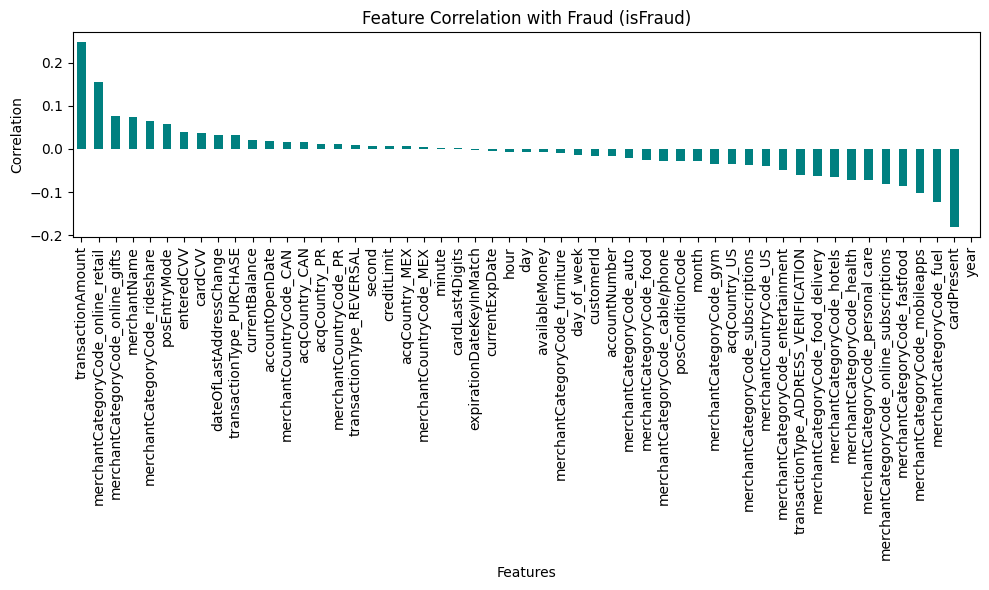

In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you filter numeric columns for correlation calculation
numeric_df = final_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Step 3: Focus on Correlation with Target (isFraud)
target_corr = correlation_matrix['isFraud'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr.drop('isFraud').plot(kind='bar', color='teal')
plt.title("Feature Correlation with Fraud (isFraud)")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


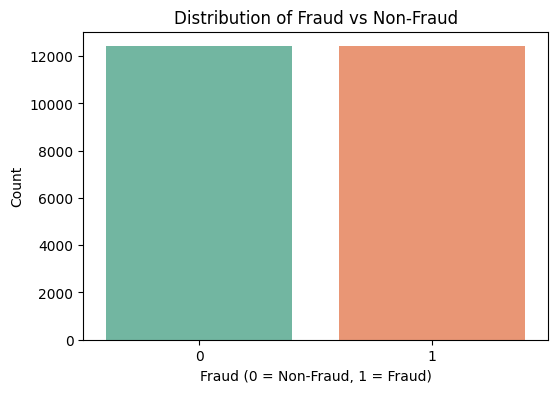

In [415]:

# Step 3: Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=final_df, x='isFraud', palette='Set2')
plt.title("Distribution of Fraud vs Non-Fraud")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

 

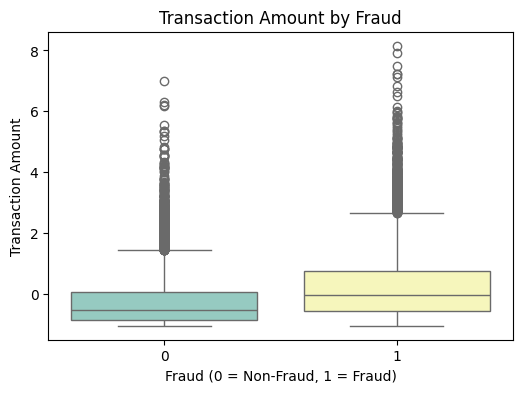

In [417]:
# Step 4: Visualizing Relationships Between Features and Target
# Example: Comparing transactionAmount with fraud
plt.figure(figsize=(6, 4))
sns.boxplot(data=final_df, x='isFraud', y='transactionAmount', palette='Set3')
plt.title("Transaction Amount by Fraud")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

 

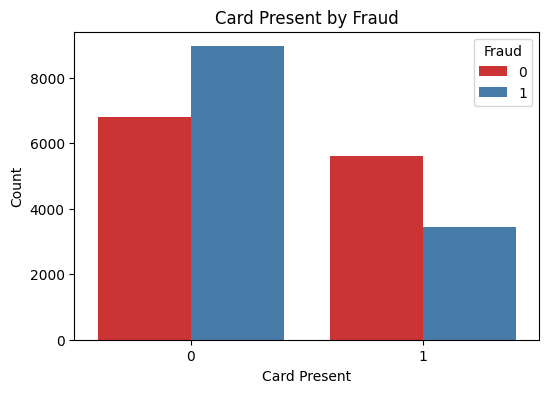

Features Most Correlated with Fraud:
isFraud                               1.000000
transactionAmount                     0.248544
merchantCategoryCode_online_retail    0.154908
merchantCategoryCode_online_gifts     0.075730
merchantName                          0.072968
merchantCategoryCode_rideshare        0.064894
posEntryMode                          0.057079
enteredCVV                            0.038442
cardCVV                               0.037790
dateOfLastAddressChange               0.033076
Name: isFraud, dtype: float64


In [419]:
# Example: Visualizing cardPresent vs Fraud
plt.figure(figsize=(6, 4))
sns.countplot(data=final_df, x='cardPresent', hue='isFraud', palette='Set1')
plt.title("Card Present by Fraud")
plt.xlabel("Card Present")
plt.ylabel("Count")
plt.legend(title="Fraud")
plt.show()

# Step 5: Insights
# Print specific insights
fraud_correlation = correlation_matrix['isFraud'].sort_values(ascending=False)
print("Features Most Correlated with Fraud:")
print(fraud_correlation.head(10))


In [422]:

# Step 5: Insights
# Print specific insights
fraud_correlation = correlation_matrix['isFraud'].sort_values(ascending=False)
print("Features Most Correlated with Fraud:")
print(fraud_correlation.head(10))


Features Most Correlated with Fraud:
isFraud                               1.000000
transactionAmount                     0.248544
merchantCategoryCode_online_retail    0.154908
merchantCategoryCode_online_gifts     0.075730
merchantName                          0.072968
merchantCategoryCode_rideshare        0.064894
posEntryMode                          0.057079
enteredCVV                            0.038442
cardCVV                               0.037790
dateOfLastAddressChange               0.033076
Name: isFraud, dtype: float64


In [424]:
df.sample(3)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,posEntryMode,posConditionCode,currentExpDate,...,acqCountry_MEX,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
672165,782081187,782081187,15000,4974.82,2016-10-16 18:16:26,128.94,425,2,1,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
730697,337810350,337810350,7500,3746.94,2016-12-26 07:41:39,22.33,1923,3,1,122,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
30728,128103719,128103719,20000,9749.16,2016-02-15 11:45:14,131.50,1938,0,1,147,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [426]:
# Create new feature for CVV match
final_df['cvv_match'] = (final_df['cardCVV'] == final_df['enteredCVV']).astype(int)

# Drop unnecessary columns
final_df = final_df.drop(columns=['cardCVV', 'enteredCVV', 'cardLast4Digits'])

# Proceed with feature engineering and modeling
final_df.head(5)

,creditLimit,availableMoney,transactionAmount,currentBalance,accountNumber,customerId,transactionDateTime,merchantName,posEntryMode,posConditionCode,...,acqCountry_PR,acqCountry_US,merchantCountryCode_CAN,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,cvv_match
0,3.273013,4.914896,-0.906788,-0.614645,100088067,100088067,2016-02-09 23:44:13,1447,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,3.273013,4.921721,-1.032062,-0.623309,100088067,100088067,2016-06-28 00:10:59,34,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,3.273013,4.941483,0.732862,-0.648392,100088067,100088067,2016-12-26 19:14:46,1447,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,-0.501004,-0.185887,0.025052,-0.624918,100328049,100328049,2016-01-30 23:14:59,1936,3,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,-0.501004,-0.137259,-0.568171,-0.686643,100328049,100328049,2016-04-04 23:20:25,863,3,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


# 5. Dataset Splitting**
Split the dataset into X (independent variables) and Y (dependent variable.**est.

In [429]:
 # Assuming df is your DataFrame
X = final_df.drop('isFraud', axis=1)  # Store all columns except 'isFraud' in X
Y = final_df['isFraud']  # Store the 'isFraud' column as the label in y


In [431]:
X=X.drop(columns=['accountNumber','customerId','merchantName','currentExpDate','dateOfLastAddressChange','transactionDateTime','merchantName'])

# 6. Train-Test Split
***Perform a train-test split with a 70-30 ratio to create X_train, X_test, y_train, and y_test.***

In [435]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=742,test_size=0.3)

In [437]:
len(X_test)

7451

<h1 align="center"><h1 align="center">Machine Learning Modeling: GBM and XGBoost</h1>

<h2>Model Development and Tuning</h2>

<h3>Objective</h3>
<p>Develop and tune two machine learning models: Gradient Boosting Machine (GBM) and XGBoost. Optimize hyperparameters to achieve the best model performance.</p>

<h2>Performance Metrics and Analysis</h2>

<h3>a. Precision, Recall, and F1-Score on the Test Sample</h3>

<h3>b. Confusion Matrix</h3>

<h3>c. ROC Curve and AUC Estimation</h3>

<h3>d. Feature/Variable Importance Plot</h3>

<h2>Model Comparison and Recommendation</h2>

<h3>Best Model Performance</h3>
<p>Based on the analysis of metrics and plots, provide a recommendation for the best-performing model to the upper management.</p>
</h1>

In [443]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb


In [445]:
models = [
    ("Random Forest", RandomForestClassifier()),
    ("Bagging", BaggingClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SGD Classifier", SGDClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", xgb.XGBClassifier())
]

# 2 . Define models with hyperparameter grids for GridSearchCV


In [448]:

param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
    },
    "Bagging": {
        'n_estimators': [50, 100],
        'max_samples': [0.8, 1.0],
        'max_features': [0.8, 1.0],
    },
    "Decision Tree": {
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga'],
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
    },
    "SGD Classifier": {
        'loss': ['hinge', 'log'],
        'penalty': ['l2', 'l1'],
        'alpha': [0.0001, 0.001],
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5],
    }
}


# 3. Define models


In [451]:

# 3. Define models
models = [
    ("Random Forest", RandomForestClassifier()),
    ("Bagging", BaggingClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("SGD Classifier", SGDClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", xgb.XGBClassifier())
]


# 4. Evaluation Function with GridSearchCV


In [454]:

def evaluate_model(model, param_grid, X_train, X_test, y_train, y_test):
    # GridSearchCV with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=StratifiedKFold(3), scoring='accuracy', n_jobs=-1, verbose=2)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Best model from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Predict on test data
    y_pred = best_model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    
    # Check if model supports predict_proba for AUC score
    if hasattr(best_model, 'predict_proba'):
        auc_score = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
        # ROC Curve
        fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
    else:
        auc_score = None
        fpr, tpr, thresholds = None, None, None
    
    # Displaying Results
    print(f"Model: {best_model.__class__.__name__}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if auc_score is not None:
        print(f"AUC Score: {auc_score:.4f}")
    
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix plot
    cm_display.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {best_model.__class__.__name__}")
    plt.show()
    
    # Plot ROC Curve if AUC score is available
    if auc_score is not None:
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='b', label=f"ROC Curve (AUC = {auc_score:.4f})")
        plt.plot([0, 1], [0, 1], color='r', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve - {best_model.__class__.__name__}")
        plt.legend(loc='lower right')
        plt.show()


# 5. Train and Evaluate each Model with GridSearchCV



Evaluating Random Forest...

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Model: RandomForestClassifier
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7141
Precision: 0.7221
Recall: 0.6997
F1-Score: 0.7108
AUC Score: 0.7876

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72      3711
           1       0.72      0.70      0.71      3740

    accuracy                           0.71      7451
   macro avg       0.71      0.71      0.71      7451
weighted avg       0.71      0.71      0.71      7451



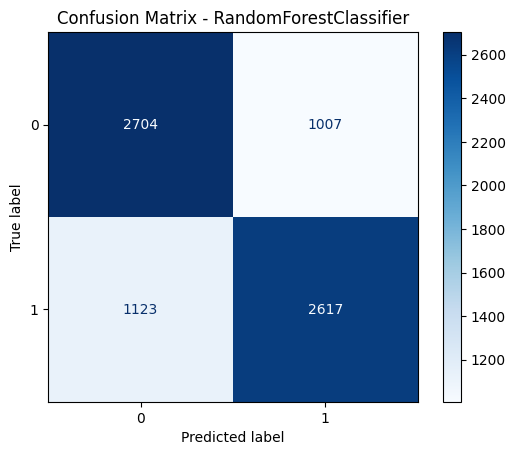

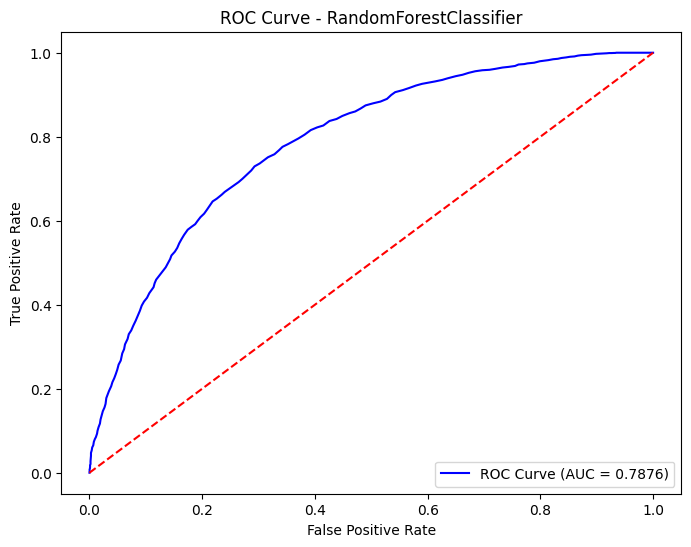


Evaluating Bagging...

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: BaggingClassifier
Best Hyperparameters: {'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 100}
Accuracy: 0.7119
Precision: 0.7200
Recall: 0.6971
F1-Score: 0.7083
AUC Score: 0.7844

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.73      0.72      3711
           1       0.72      0.70      0.71      3740

    accuracy                           0.71      7451
   macro avg       0.71      0.71      0.71      7451
weighted avg       0.71      0.71      0.71      7451



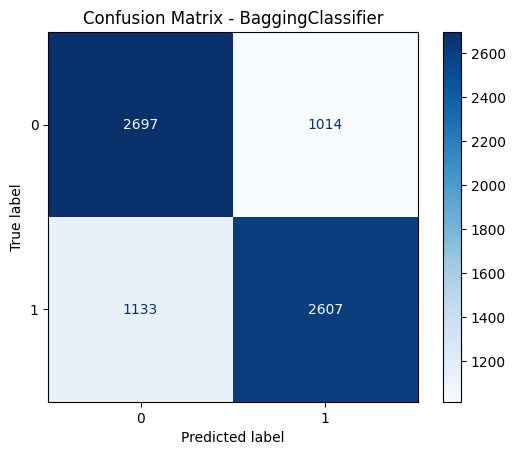

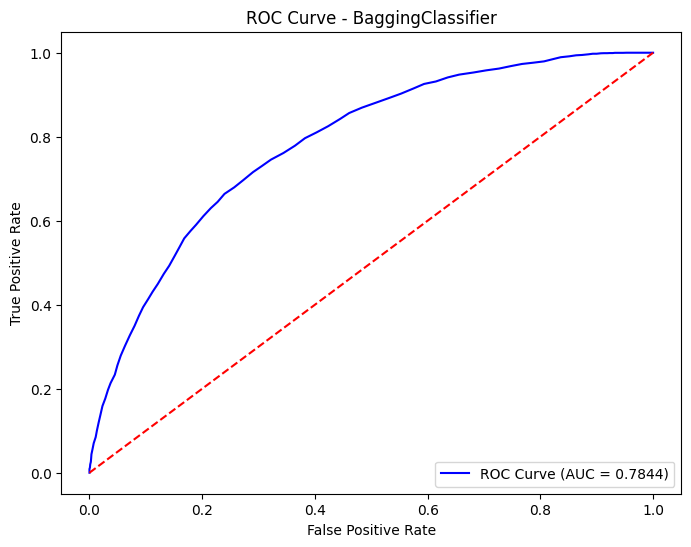


Evaluating Decision Tree...

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: DecisionTreeClassifier
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5}
Accuracy: 0.6778
Precision: 0.6805
Recall: 0.6749
F1-Score: 0.6777
AUC Score: 0.7253

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      3711
           1       0.68      0.67      0.68      3740

    accuracy                           0.68      7451
   macro avg       0.68      0.68      0.68      7451
weighted avg       0.68      0.68      0.68      7451



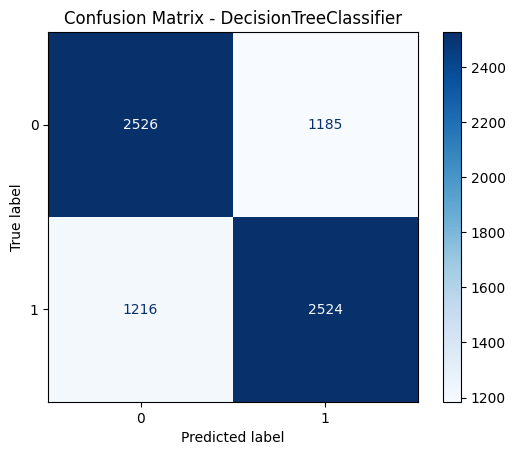

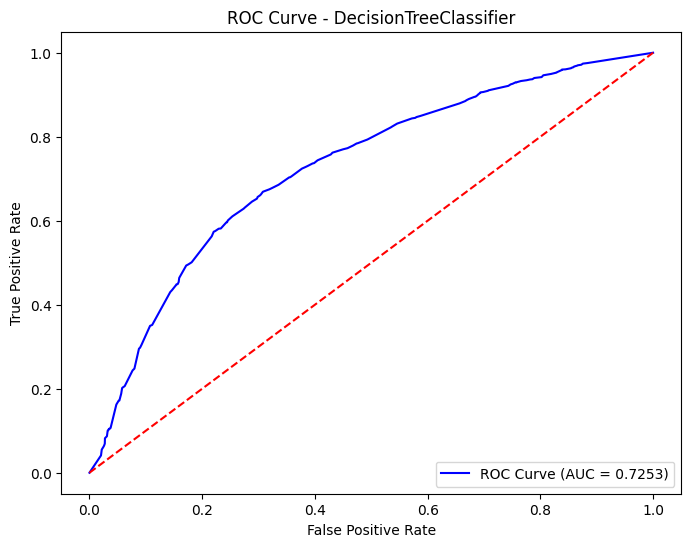


Evaluating Logistic Regression...

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: LogisticRegression
Best Hyperparameters: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.6568
Precision: 0.6475
Recall: 0.6944
F1-Score: 0.6701
AUC Score: 0.7143

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64      3711
           1       0.65      0.69      0.67      3740

    accuracy                           0.66      7451
   macro avg       0.66      0.66      0.66      7451
weighted avg       0.66      0.66      0.66      7451



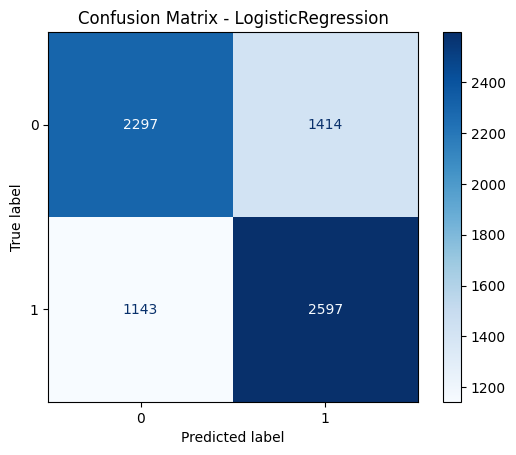

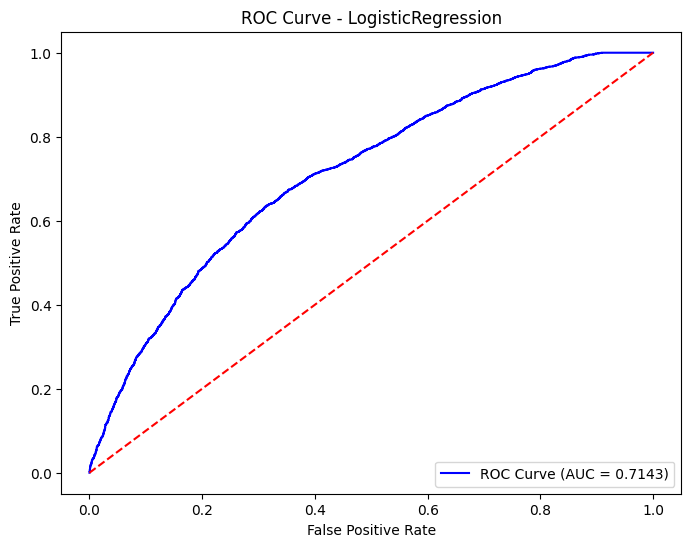


Evaluating K-Nearest Neighbors...

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Model: KNeighborsClassifier
Best Hyperparameters: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy: 0.5316
Precision: 0.5332
Recall: 0.5374
F1-Score: 0.5353
AUC Score: 0.5465

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53      3711
           1       0.53      0.54      0.54      3740

    accuracy                           0.53      7451
   macro avg       0.53      0.53      0.53      7451
weighted avg       0.53      0.53      0.53      7451



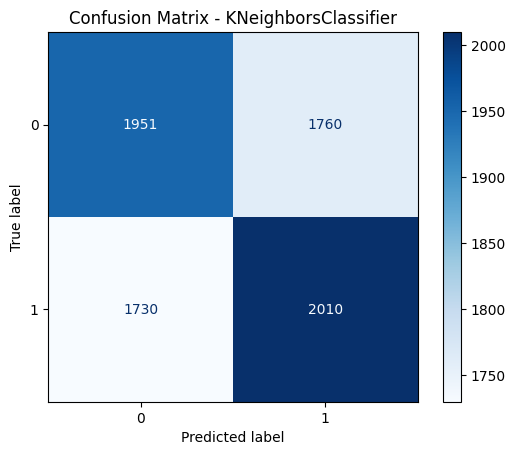

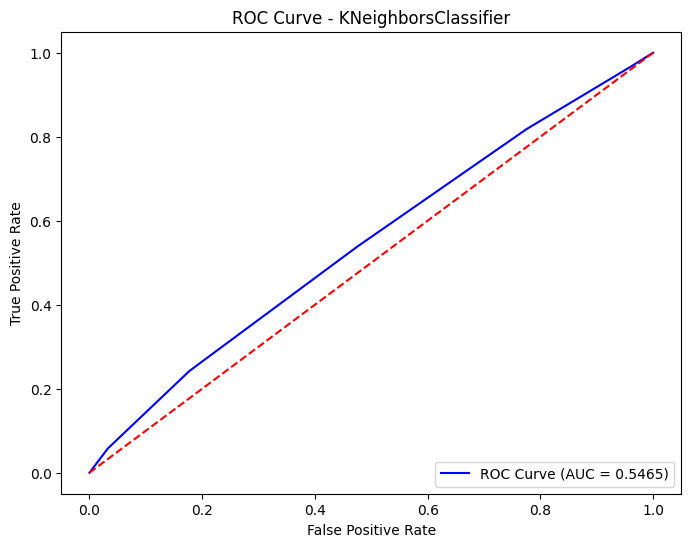


Evaluating SGD Classifier...

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: SGDClassifier
Best Hyperparameters: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
Accuracy: 0.5009
Precision: 0.6780
Recall: 0.0107
F1-Score: 0.0211

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.99      0.67      3711
           1       0.68      0.01      0.02      3740

    accuracy                           0.50      7451
   macro avg       0.59      0.50      0.34      7451
weighted avg       0.59      0.50      0.34      7451



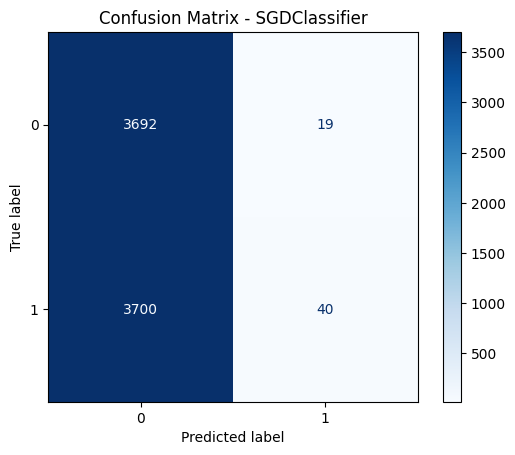


Evaluating Gradient Boosting...

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: GradientBoostingClassifier
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.7344
Precision: 0.7355
Recall: 0.7353
F1-Score: 0.7354
AUC Score: 0.8091

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      3711
           1       0.74      0.74      0.74      3740

    accuracy                           0.73      7451
   macro avg       0.73      0.73      0.73      7451
weighted avg       0.73      0.73      0.73      7451



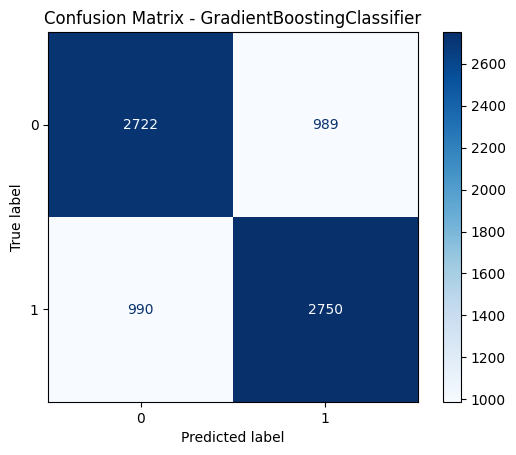

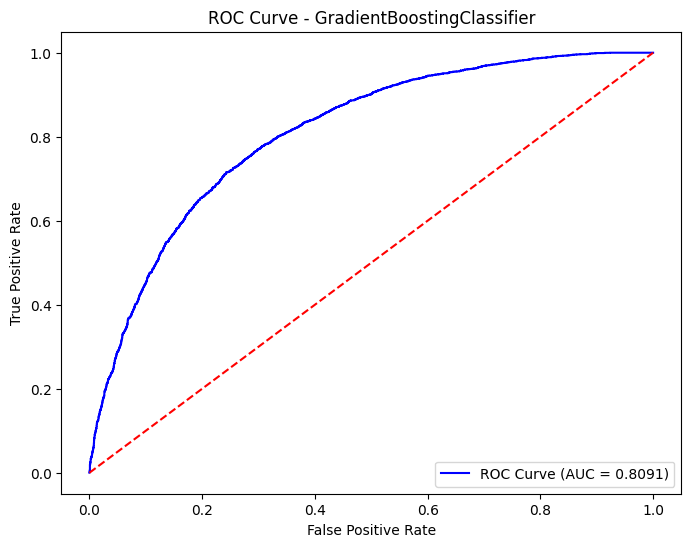


Evaluating XGBoost...

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Model: XGBClassifier
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 0.7317
Precision: 0.7367
Recall: 0.7243
F1-Score: 0.7305
AUC Score: 0.8034

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      3711
           1       0.74      0.72      0.73      3740

    accuracy                           0.73      7451
   macro avg       0.73      0.73      0.73      7451
weighted avg       0.73      0.73      0.73      7451



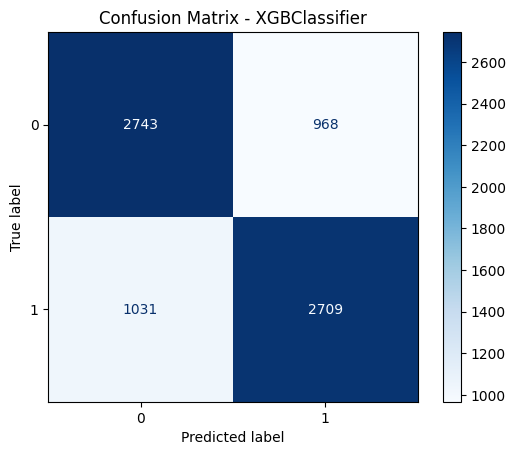

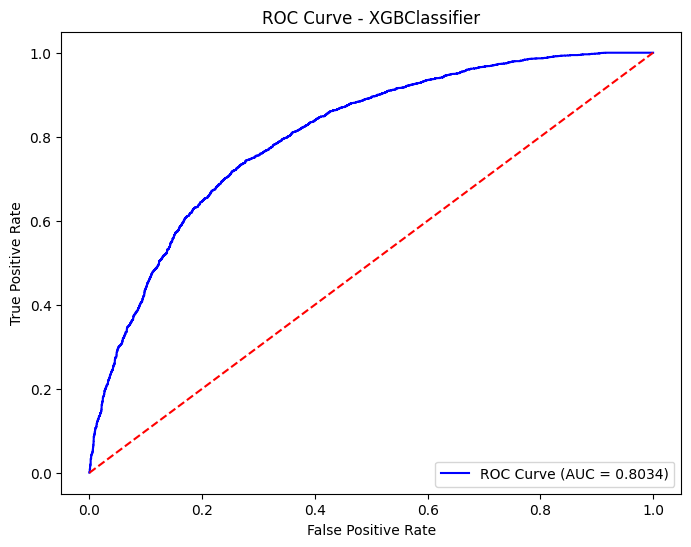

In [459]:
 
# Iterate through models
for name, model in models:
    print(f"\nEvaluating {name}...\n")
    evaluate_model(model, param_grids[name], X_train, X_test, y_train, y_test)


# <h1 align="center">Model Performance Comparison & Recommendation</h1>

## <h2>Model Performance Comparison</h2>

### Description of various models and their performance metrics. Discuss:
- Model accuracy
- Precision, recall, F1 score
- AUC-ROC, confusion matrix
- Cross-validation results

---

## <h2>Machine Learning Interpretability: SHAP Analysis</h2>

### <h3>a. Partial Dependence Plot for Top 5 Variables</h3>
- Discuss the feature importance and how the target variable changes as the top 5 important features change.

---

### <h3>b. Mean SHAP Bar Plot</h3>
- Show the Mean SHAP bar plot to demonstrate the average contribution of each feature to the model's predictions.

---

### <h3>c. Beeswarm Plot</h3>
- Discuss how the Beeswarm plot visualizes individual SHAP values for each feature and gives insights into feature interactions.

---

### <h3>d. Waterfall Plot for the nth Observation</h3>
- Provide an example of how SHAP breaks down the prediction for a specific observation, helping explain the model's reasoning for its prediction.

---

## <h2>Conclusion & Further Insights</h2>
- Summarize key findings from the model comparison.
- Provide insights into model interpretability and how it helps improve decision-making.
- Suggest next steps or improvements for further modeling.

hts</h2>
nt id

In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.metrics import mean_squared_error

# Train a model (RandomForest as an example)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Predict and calculate performance
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Initialize the SHAP explainer with the TreeExplainer (for tree-based models like RandomForest)
explainer = shap.TreeExplainer(best_model)

# Get SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# === a. Partial Dependence Plot for the Top 5 Variables ===
# Select top 5 features based on mean absolute SHAP value
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_features = mean_abs_shap.argsort()[-5:][::-1]  # Get indices of top 5 features by mean absolute SHAP value
top_feature_names = X_train.columns[top_features]

# Plot Partial Dependence for top 5 features using the trained model
for feature in top_feature_names:
    shap.partial_dependence_plot(
        feature,
        best_model.predict,  # Pass the prediction function here
        X_train,
        show=True
    )
# === b. Mean SHAP Bar Plot ===
shap.summary_plot(shap_values, X_test, plot_type="bar")

# === c. Beeswarm Plot ===
shap.summary_plot(shap_values, X_test)

# === d. Waterfall Plot for the nth Observation (using the last 3 digits of your student ID) ===
n = 742  # 3 digits of  student ID

# Convert shap_values[n] into an Explanation object
shap_instance = shap.Explanation(
    values=shap_values[n].reshape(1, -1),  # Ensure it's a 2D array (1, n_features)
    base_values=explainer.expected_value,  # The expected value for the model
    data=X_test.iloc[n:n+1].values,  # The feature values for the nth instance (ensure it's a 2D array)
    feature_names=X_test.columns.tolist()  # The feature names
)

# Now plot the waterfall for the specific instance
shap.waterfall_plot(shap_instance[0])

# === Model Performance Comparison ===
# Compare the performance of the trained model
print(f"Mean Squared Error (MSE) of the model: {mse}")


# Machine Learning Model Evaluation for Classification Task

## Introduction
The project focuses on implementing and evaluating multiple machine learning models for a classification task. Specific models like **Random Forest**, **Gradient Boosting**, and **XGBoost** are evaluated, with detailed performance metrics to determine the most effective algorithm.

## Models Used
The following models were implemented and tested:

- **Random Forest**
- **Bagging Classifier**
- **Decision Tree**
- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Stochastic Gradient Descent (SGD)**
- **Gradient Boosting**
- **XGBoost**

## Key Metrics Evaluated
The project uses standard evaluation metrics:

- **Accuracy**
- **Precision**
- **Recall**
- **F1-Score**
- **AUC** (Area Under the ROC Curve)

Additionally, confusion matrices and ROC curves were generated for a detailed performance analysis.

## Insights from SHAP Analysis
SHAP (SHapley Additive exPlanations) was used to interpret the machine learning models:

- **Partial Dependence Plots**: Highlighted relationships between top features and model predictions.
- **Mean SHAP Values**: Identified the most influential features.
- **Beeswarm and Waterfall Plots**: Provided insights into feature contributions for specific predictions.

## Results
The models were evaluated using cross-validation and hyperparameter tuning with **GridSearchCV**.

- **XGBoost** and **Gradient Boosting** generally outperformed other models in terms of **AUC** and **F1-scores**, making them the most promising candidates.

Visualization of results included:

- **ROC Curves**
- **Confusion Matrices**
- **SHAP visualizations** for interpretability.

## Conclusion
The project successfully implemented and evaluated multiple machine learning models, with clear evidence of **XGBoost** and **Gradient Boosting** providing the best performance. SHAP analysis added a layer of interpretability, highlighting critical features that influence predictions. Future work could involve fine-tuning the models further or testing them on new datasets for validation.
